In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
from PIL import Image
import warnings # skip warns
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


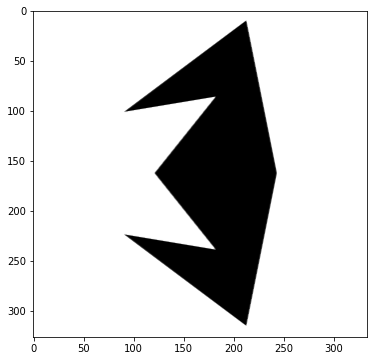

In [20]:
img = Image.open('batman.png')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: F.rotate(x, angle=90)), # поворот
    #transforms.Resize((img.width // 2, img.height // 2)), # масштабування
    #transforms.RandomAffine(degrees=90, shear=10), # нахил
    #transforms.RandomVerticalFlip(1) # відзеркалюування відносно 0x
    
])

tensor_image = transform(img)



transform_to_pil = transforms.ToPILImage()
rotated_image = transform_to_pil(tensor_image)

plt.figure(figsize=(6, 6))
plt.imshow(rotated_image)

plt.show()

In [9]:
class Transformers2D():
    def __init__(self, origin_matrix, marker='Почтакова матриця '):
        self.origin_matrix = origin_matrix
        self.marker = ' ' + marker
    
    def rotate(self, angle): 
        radians = np.radians(angle)
        rotate = np.array([[np.cos(radians), -np.sin(radians)],
                          [np.sin(radians), np.cos(radians)]])
        return Transformers2D(self.origin_matrix @ rotate, marker=self.marker + f'повернтий на {angle} градусів; ')
    
    def scaling(self, k_x=1, k_y=1):
        transform = np.array([[k_x, 0],
                             [0, k_y]])
        return Transformers2D(self.origin_matrix @ transform, marker=f'збільшений у {k_x} по 0x і у {k_y} по 0y; ')
    
    def reflection_x(self):
        transform = np.array([[1, 0],
                             [0, -1]])
        
        return Transformers2D(self.origin_matrix @ transform, marker=f'Об\'єкт відзеркалений відносно вісі 0x; ')
    
    def reflection_y(self):
        transform = np.array([[-1, 0],
                             [0, 1]])
        
        return Transformers2D(self.origin_matrix @ transform, marker=f'Об\'єкт відзеркалений відносно вісі 0y; ')
    
    def move_x(self, angle):
        radians = np.radians(angle)
        transform = np.array([[1, np.tan(radians)],
                             [0, 1]])
        return Transformers2D(self.origin_matrix @ transform, marker=f'Нахил осі координат на кут 0x на {angle}; ')
    
    def move_y(self, angle):
        radians = np.radians(angle)
        transform = np.array([[1, 0], 
                              [np.tan(radians), 1]])
        return Transformers2D(self.origin_matrix @ transform, marker=f'ОНахил осі координат на кут 0y на {angle}; ')
    
    def any_transforamtion(self, matrix): # будь-яка матрциця перетворення
        return Transformers2D(self.origin_matrix @ matrix, marker= 'довільне перетворення; ')
    
    def visualizatin(self): # візуалізація
        plt.plot(self.origin_matrix[:, 0], self.origin_matrix[:, 1], 'r-', color='green')

        plt.axhline(0, color='black',linewidth=0.5)
        plt.axvline(0, color='black',linewidth=0.5)
        plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(self.marker)
        ax = plt.gca()
        ax.spines['left'].set_linewidth(2)
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['bottom'].set_color('black')

        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        plt.show()
        
        

In [10]:
import numpy as np

In [11]:
batman = np.array([[0, 0], 
                   [1, 0.2], 
                   [0.4, 1], 
                   [0.5, 0.4], 
                   [0, 0.8], 
                   [-0.5, 0.4], 
                   [-0.4, 1], 
                   [-1, 0.2], 
                   [0, 0]])

In [12]:
transformer = Transformers2D(batman)

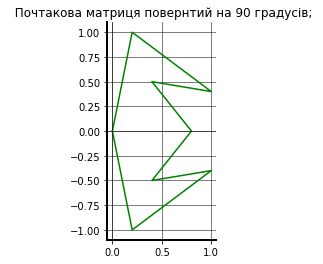

In [14]:
transformer.rotate(90).visualizatin()

Матриця повороту працює за годиннковою стрілкою в моїй реалізації, і проти в torchvision